In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Define the path to your Excel file on Google Drive
load_file = 'DL (NR) 23-24.xlsx'
load_file2= 'DL (NR) 22-23.xlsx'
merged_data= 'data.xlsx'

In [4]:
# Read the Excel file into a pandas DataFrame
data= pd.read_excel(merged_data, skiprows=2, skipfooter=7)
data= data.T
data = data[3:].apply(pd.to_numeric, errors= 'coerce')
print(data.shape)
print(data.head())
print(len(data))

(479, 96)
                 0      1      2      3      4      5      6      7      8   \
Actual(MW)    16.07  13.75  13.13  10.36   9.96   8.57  12.33  11.75  13.56   
Actual(MW).1  13.08  12.35   8.73  10.18  13.33   8.17  11.89  13.22  12.24   
Actual(MW).2  14.79  13.89  17.10  16.63  16.25  17.25  12.79  16.56   9.86   
Actual(MW).3  15.70  12.38  15.55  14.29  17.01  13.50  14.17  15.26  14.12   
Actual(MW).4  15.34   6.72   8.74   8.25   8.53  10.29  11.65  10.06   9.36   

                 9   ...     86     87     88     89     90     91     92  \
Actual(MW)    11.48  ...  18.41  11.74  16.77  17.44  17.99  17.89  15.58   
Actual(MW).1  11.54  ...  21.47  18.33  17.95  20.60  19.83  17.80  17.00   
Actual(MW).2  11.83  ...  21.15  25.64  18.58  18.58  17.46  17.34  23.52   
Actual(MW).3  17.42  ...  16.08  14.91  18.50  15.91  16.59  13.19  16.67   
Actual(MW).4   9.60  ...  17.11  13.41  15.54  16.68  14.62  20.64  20.32   

                 93     94     95  
Actual(MW)    15

In [5]:
# Reshape the dataframe using the stack() function
df = pd.DataFrame(data.stack(dropna=False).to_frame().reset_index()[0])
print(len(df))
# df.index = pd.date_range(start='4/1/2022 0:00',  freq='15min', periods= len(df))
df['Interval'] = pd.date_range(start='4/1/2022 0:00',  freq='15min', periods= len(df))
df.index = pd.RangeIndex(1, len(df) + 1)
# df
# print("DataFrame Type:", type(df))
# print("Index Type:", type(df['Interval']))
# print("Index Frequency:", df['Interval'].freq)
df.interpolate(method='ffill', inplace=True)
df= df.dropna(axis= 0)
# print("DataFrame Type:", type(df))
# print("Index Type:", type(df.index))
# print("Index Frequency:", df.index.freq)
# df['Interval']= df.index
# df['Index'] = range(1, len(df) + 1)
df.columns = ['Value', 'Interval']
# df.index.name = ''
print(df.head())
print(len(df))
print(df.loc[1, ['Interval', 'Value']])
print("Index Type:", type(df.index))

45984
   Value            Interval
1  16.07 2022-04-01 00:00:00
2  13.75 2022-04-01 00:15:00
3  13.13 2022-04-01 00:30:00
4  10.36 2022-04-01 00:45:00
5   9.96 2022-04-01 01:00:00
45984
Interval    2022-04-01 00:00:00
Value                     16.07
Name: 1, dtype: object
Index Type: <class 'pandas.core.indexes.range.RangeIndex'>


In [6]:
days_in_months = [30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 23]
for i in range(len(days_in_months)):
    print(df.loc[sum(days_in_months[:i]) * (24 * 4) +1, ['Interval']])

Interval    2022-04-01 00:00:00
Name: 1, dtype: object
Interval    2022-05-01 00:00:00
Name: 2881, dtype: object
Interval    2022-06-01 00:00:00
Name: 5857, dtype: object
Interval    2022-07-01 00:00:00
Name: 8737, dtype: object
Interval    2022-08-01 00:00:00
Name: 11713, dtype: object
Interval    2022-09-01 00:00:00
Name: 14689, dtype: object
Interval    2022-10-01 00:00:00
Name: 17569, dtype: object
Interval    2022-11-01 00:00:00
Name: 20545, dtype: object
Interval    2022-12-01 00:00:00
Name: 23425, dtype: object
Interval    2023-01-01 00:00:00
Name: 26401, dtype: object
Interval    2023-02-01 00:00:00
Name: 29377, dtype: object
Interval    2023-03-01 00:00:00
Name: 32065, dtype: object
Interval    2023-04-01 00:00:00
Name: 35041, dtype: object
Interval    2023-05-01 00:00:00
Name: 37921, dtype: object
Interval    2023-06-01 00:00:00
Name: 40897, dtype: object
Interval    2023-07-01 00:00:00
Name: 43777, dtype: object


479


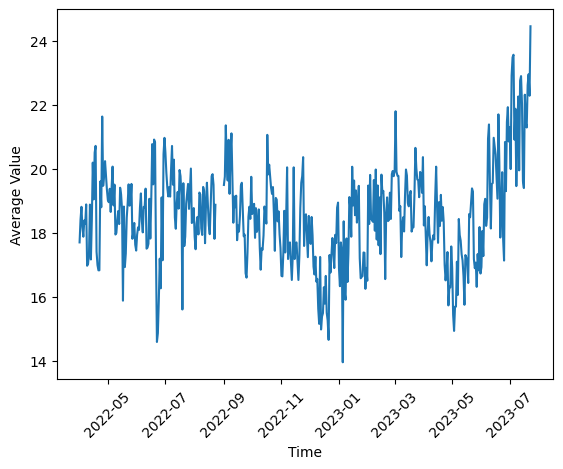

In [7]:
# Calculate the average of each day/row
data.index = pd.date_range(start='4/1/2022 0:00', periods=len(data), freq='1d')
daily_average = data.mean(axis=1)
print(len(daily_average))
# print((data.index ))
# Plot the daily average values
# Plot the daily average values
# print(data.index[-1])
plt.plot(data.index, daily_average)
plt.xlabel('Time')
# plt.xticks(data.index, [date.strftime('%m/%d') for date in data.index])
plt.ylabel('Average Value')
plt.xticks(rotation=45)
# Set the x-axis tick labels to display every nth tick
# n = 5  # Set the desired interval between ticks
# plt.xticks(np.arange(0, len(data.index), n))

plt.show()

In [8]:

# Extract the values from the DataFrame
val = np.reshape(df.values[:, 0], (-1, 1))
dates= df['Interval']
# val= df.values.reshape(df.values.shape[0], 1)
print(val.shape)
print(val[0:2])
# Shape (114, 96)
# print("We have extracted the pandas dataframe into a numpy array of shape ", values.shape)


(45984, 1)
[[16.07]
 [13.75]]


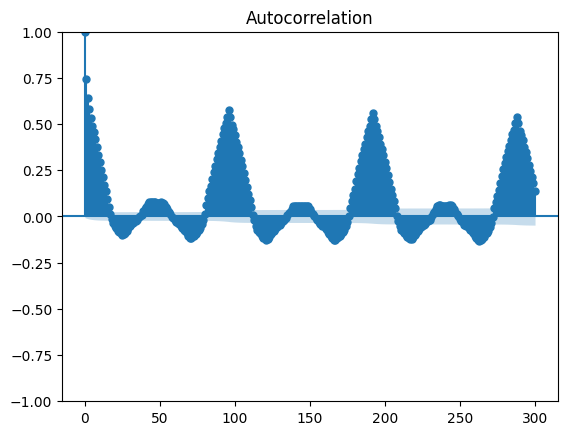

1     NaN
2   -2.32
3   -0.62
4   -2.77
5   -0.40
Name: Value, dtype: float64


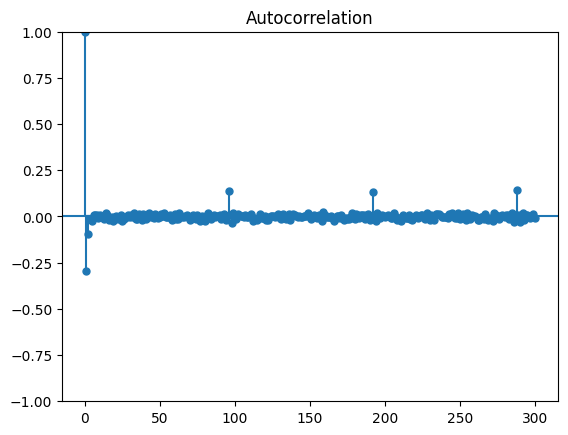

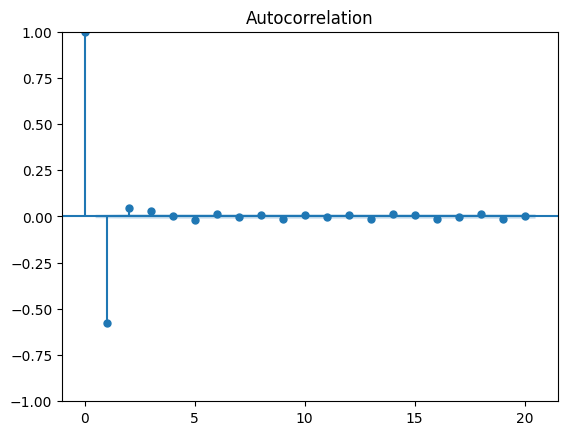

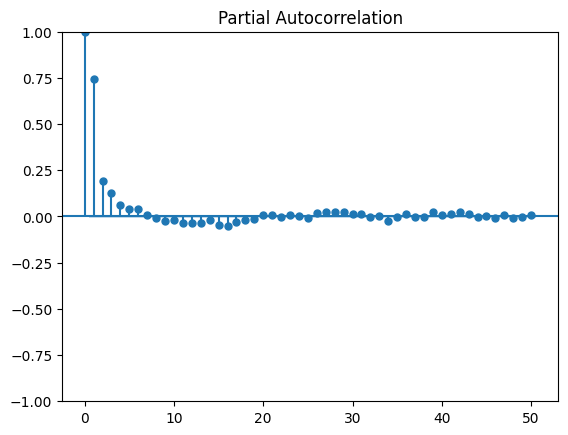

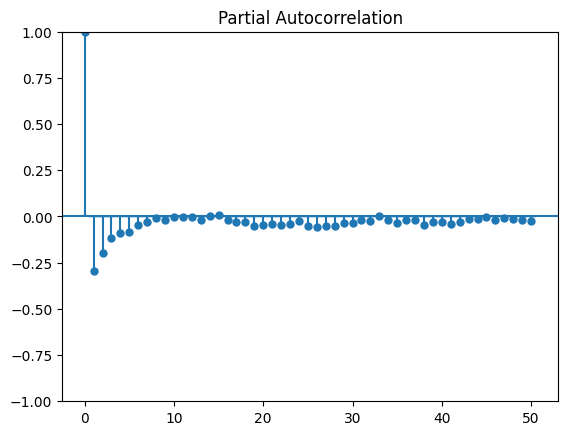

In [9]:
# Plot the time series data
# plt.plot(df['Value'])
# plt.title('Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()
# Determine the order of differencing 'd' and order of ARMA terms 'p' and 'q' # Plot ACF and PACF to help identify potential values
plot_acf(val, lags=300, alpha=0.05)
plt.show()
print(df['Value'].diff().head())# Has Nan as first value so need to remove it. 
plot_acf(df['Value'].diff().dropna(), lags=300)  # Use .dropna() to remove NaN from the first differencing. 
plt.show()
plot_acf(df['Value'].diff().dropna().diff().dropna(), lags=20)  # Use .dropna() to remove NaN from the first differencing. 
plt.show()
# SImilar. So I guess we can just use one differenced data 
# When you difference the time series (df['Value'].diff()), you are essentially transforming it into a stationary time series.
# If you still observe significant correlations in the ACF plot after differencing, it suggests that there might be a need for further
# differencing to achieve stationarity. The goal of differencing is to remove trends and make the series stationary (constant mean and variance).
# plot_acf(df['Value'].diff().diff(), lags=20)
plot_pacf(val, lags=50)
plot_pacf(df['Value'].diff().dropna(), lags=50)
plt.show()

In [10]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# # Check the DataFrame type and index type
# ts = df['Value'][0:]
# print(ts.head())
# print("DataFrame Type:", type(ts))
# print("Index Type:", type(ts.index))
# print("Index Frequency:", ts.index.freq)
# result = seasonal_decompose(ts, model='additive', period=1)
# # print(df.index)
# result.plot()
# plt.show()

In [11]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
# normalized_data = scaler.fit_transform(values)
normalized_data = scaler.fit_transform(val)
print(normalized_data.shape)

(45984, 1)


In [12]:
def evaluate(model, X, y, plot):
    # print(predicted_values_denormalized.shape, true_values_denormalized.shape)
    # print(predicted_values_denormalized.dtype)
    pred_norm = model.predict(X)	# Denormalize the predicted value
    pred = scaler.inverse_transform(pred_norm)
    y= y.reshape((y.shape[0], -1))
    true = scaler.inverse_transform(y)
    pred= pred.reshape(pred.shape[0]*pred.shape[1], 1)
    true= true.reshape(true.shape[0]*true.shape[1], 1)
    diff= pred- true
    diff_percentage= (pred- true)/ true
    # print(diff.shape)
    rmse= np.sqrt(np.mean(diff**2))
    # print(rmse)
    mape= (np.mean(np.abs(diff_percentage)))*10
    # print(f"MAPE is {mape: 0.1f}%")
    plt.figure(figsize=(20,10))
    plt.xlabel('Time')
    plt.ylabel('Load')
    plt.title(plot+ ' Predictions')
    plt.plot(pred, label= "Predictions")
    plt.plot(true, label= "Actual")
    plt.legend()
    return rmse, mape

In [13]:
# Define the number of days in each month (you can adjust this as needed)
days_in_months = [30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 23]
names = ['April 22', 'May 22', 'June 22', 'July 22', 'August 22', 'September 22', 'October 22', 'November 22', 'December 22', 'January 23', 'February 23', 'March 23', 'April 23', 'May 23', 'June 23', 'July 23']
sequence_length = 10
# Initialize a list to store the loss values for each model
losses = []

In [14]:
# X=[]
# y=[]
# for i in range(len(normalized_data) - sequence_length):
#   X.append(normalized_data[i:i + sequence_length])
#   y.append(normalized_data[i + sequence_length])
# X = np.array(X)
# y = np.array(y)
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # Build the LSTM model
# #Shuffle is kept as false to maintain sequential nature of data?
# # print(X_train.shape) (83, 10, 96) : I guess 83 examples of sequences of length 10, each of size 96, indicating one day of readings: 96= 1440/15
# train_data_len= X_train.shape[0]
# test_data_len= X_test.shape[0]
# print(X_train.shape)
# print(X_test.shape)
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(LSTM(units=50, activation='relu', return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1)) # Output layer
# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# # Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")
# # Make predictions
# predicted_values = model.predict(X_test)
# # Denormalize the predicted values
# predicted_values_denormalized = scaler.inverse_transform(predicted_values)
# true_values_denormalized = scaler.inverse_transform(y_test)
# # Print or visualize the predictions and actual values
# # ... (add code to display the predictions and actual values)

In [29]:
# results = pd.DataFrame(columns=['Model Name', 'Train MAPE', 'Train RMSE', 'Test MAPE', 'Test RMSE', 'Arch'])
res= pd.read_excel('model_results.xlsx')
print(res)

    Model Name  Train MAPE  Train RMSE  Test MAPE  Test RMSE  Sequence  \
0    model1.h5    1.333841    2.835572   1.157610   3.040208        10   
1    model2.h5    1.324071    2.821369   1.160644   3.092082        10   
2    model3.h5    1.314428    2.820531   1.162299   3.090139        10   
3    model4.h5    1.364278    2.860753   1.163084   3.031482        10   
4    model5.h5    1.286333    2.820314   1.161226   3.148161        10   
5    model6.h5    1.273011    2.838334   1.149672   3.133574        10   
6    model7.h5    1.375451    2.858624   1.164739   3.047246        10   
7    model8.h5    1.773230    3.629354   1.681394   4.410109        10   
8    model9.h5    1.289879    2.704540   1.121480   2.917493        96   
9   model10.h5    1.253236    2.727334   1.111353   2.904129        96   
10  model11.h5    1.253863    2.767380   1.147170   3.173255       384   
11  model12.h5    1.226273    2.722427   1.119632   3.062553       128   
12  model13.h5    1.225024    2.673188

Training till June 23 and testing on July 23
Length of training set is 43776
(21, 96, 1) (21, 96, 1)
Fitting model
X and Y (21, 96, 1) (21, 96, 1)
1/1 [==============================] - 0s 203ms/step
Predictions shape  (21, 96)
True shape  (21, 96)
True and pred  (2016, 1) (2016, 1)
Diff shape  (2016, 1)
Length of diff percentage  2016
Day diff shape  (21, 96)


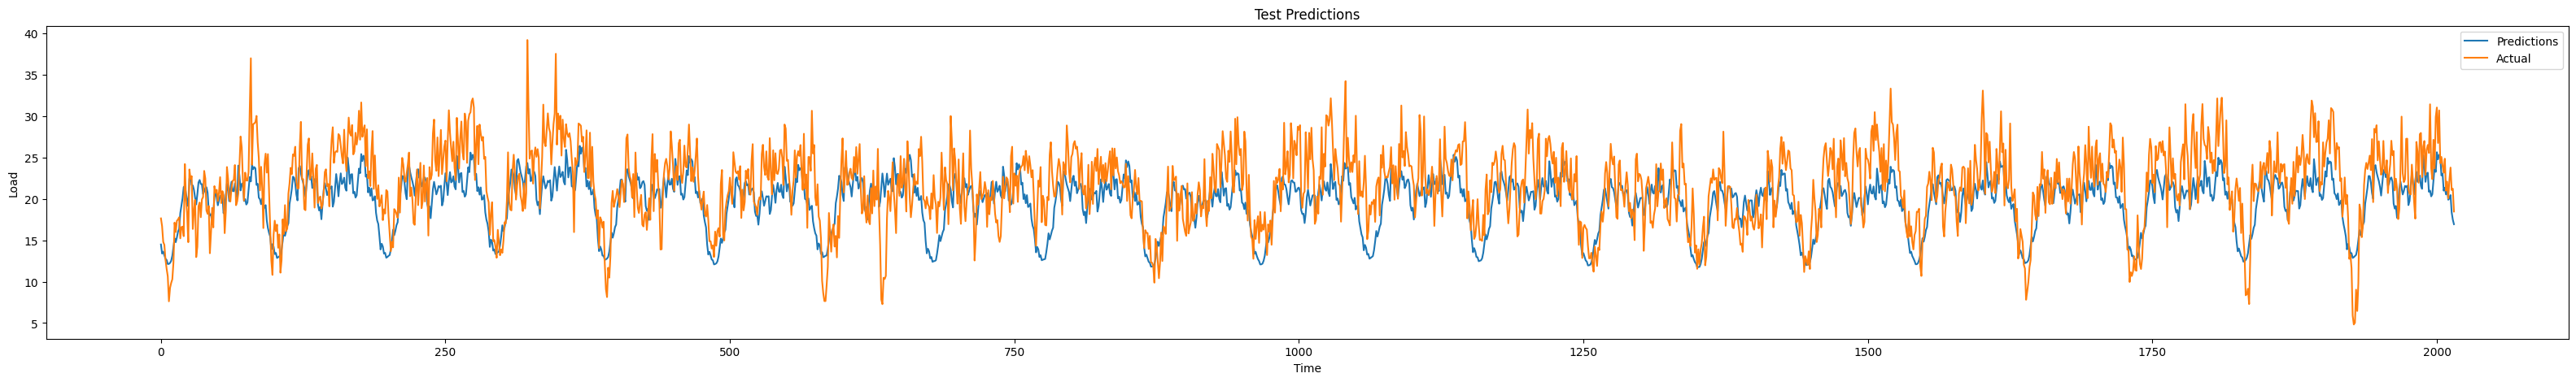

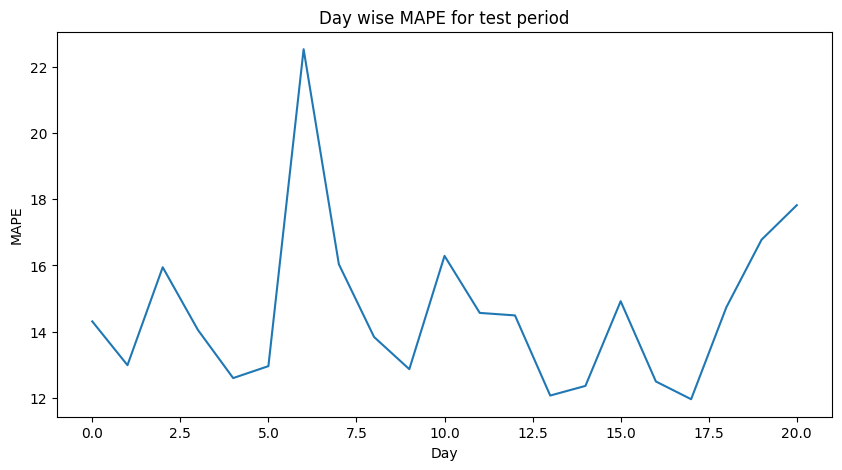

X and Y (454, 96, 1) (454, 96, 1)
15/15 [==============================] - 0s 13ms/step
Predictions shape  (454, 96)
True shape  (454, 96)
True and pred  (43584, 1) (43584, 1)
Diff shape  (43584, 1)
Train Loss for train data till June 23: 1.4559281710750513
Test Loss on Month July 23: 1.4598377443705044


/var/folders/2t/1b591x_d1wz5rz5gn_10qdww0000gn/T/ipykernel_1115/2470670000.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Model Name': model_name, 'Train MAPE': loss_train_mape, 'Train RMSE': loss_train_rmse, 'Test MAPE': loss_test_mape, 'Test RMSE': loss_test_rmse, 'Sequence': sequence_length, 'Arch':arch}, ignore_index=True)


In [30]:
# Define the number of days in each month (you can adjust this as needed)
days_in_months = [30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 23]
names = ['April 22', 'May 22', 'June 22', 'July 22', 'August 22', 'September 22', 'October 22', 'November 22', 'December 22', 'January 23', 'February 23', 'March 23', 'April 23', 'May 23', 'June 23', 'July 23']
sequence_length = 192
output_length= 96
# Initialize a list to store the loss values for each model
losses = []

# def evaluate_train(model, X_train, y_train)

def evaluate(model, X, y, plot, flag):
    # print(predicted_values_denormalized.shape, true_values_denormalized.shape)
    # print(predicted_values_denormalized.dtype)
    #X and Y (2112, 96, 1) (2112, 1, 1)
	# Predictions shape  (2112, 1)
	# True shape  (2112, 1)
	# True and pred  (2112, 1) (2112, 1)
	# Diff shape  (2112, 1)
	# Length of diff percentage  2112
    print("X and Y", X.shape, y.shape)
    # X and Y (2016, 96, 1) (2016, 96, 1)
    # Predictions shape  (2016, 96)
	#  True shape  (2016, 96)
	# True and pred  (193536, 1) (193536, 1)
    pred_norm = model.predict(X)	# Denormalize the predicted value
    pred = scaler.inverse_transform(pred_norm)
    print("Predictions shape ", pred.shape)
    y= y.reshape((y.shape[0], -1))
    true = scaler.inverse_transform(y)
    print("True shape ", true.shape)
    pred= pred.reshape(pred.shape[0]*pred.shape[1], 1)
    true= true.reshape(true.shape[0]*true.shape[1], 1)
    print("True and pred " ,true.shape, pred.shape )
    diff= pred- true
    diff_percentage= (pred- true)/ true
    print("Diff shape ",diff.shape)
    rmse= np.sqrt(np.mean(diff**2))
    # print(rmse)
    mape= (np.mean(np.abs(diff_percentage)))*10
    # print(f"MAPE is {mape: 0.1f}%")
    # Plot predictions and true values 
    if(flag==0):
        return rmse, mape
    plt.figure(figsize=(40,5))
    plt.xlabel('Time')
    plt.ylabel('Load')
    plt.title(plot+ ' Predictions')
    plt.plot(pred, label= "Predictions")
    plt.plot(true, label= "Actual")
    plt.legend()
    
    diff_percentage1= np.abs(diff_percentage) [:(len(diff_percentage)//96)*96]
    print("Length of diff percentage ", len(diff_percentage1))
    day_diff= diff_percentage1.reshape(-1, 96)
    print("Day diff shape ",day_diff.shape)
    mape_day= np.mean(day_diff, axis= 1)*100
    # print(mape_day.shape)
    plt.figure(figsize= (10, 5))
    plt.xlabel("Day")
    plt.ylabel("MAPE")
    plt.title("Day wise MAPE for test period")
    plt.plot(mape_day)
    plt.show()
# 94 days of mape to be calculated 
    return rmse, mape


# Iterate over each month and train-test split
model_name= 'model15.h5'
flag= 0
data_flag= 0
arch= 'L64, D128, D64, D32, D96'
for i in range(len(days_in_months) - 1):
    # print(names[i])
    if(names[i]!="June 23"):
        continue
    print(f"Training till {names[i]} and testing on {names[i+1]}")
    start_idx = 0  # Calculate the starting index for the current month
    end_idx = sum(days_in_months[:i+1]) * (24 * 4)  # Calculate the ending index for the current month
    next_month_end_idx = sum(days_in_months[:i+2]) * (24 * 4)  # Calculate the ending index for the next month
    print(f"Length of training set is {-1*(start_idx-end_idx)}")
    # Extract data for the current and next month
    current_month_data = normalized_data[start_idx:end_idx]
    next_month_data = normalized_data[end_idx:next_month_end_idx]

    # Split data into sequences and labels for the current month
    X_current_month, y_current_month = [], []
    if(data_flag):
        g= sequence_length
        f= sequence_length+ 1
    else:
        g = 2*sequence_length
        f= output_length
    for j in range(0, len(current_month_data) - g, sequence_length):
        X_current_month.append(current_month_data[j:j + sequence_length])
        y_current_month.append(current_month_data[j + sequence_length: j+ sequence_length+ output_length])
        # y_current_month.append(current_month_data[j + sequence_length])
    X_current_month = np.array(X_current_month)
    y_current_month = np.array(y_current_month)

    # Split data into sequences and labels for the next month
    X_next_month, y_next_month = [], []
   
    for j in range(0, len(next_month_data) - g, sequence_length):
        X_next_month.append(next_month_data[j:j + sequence_length])
        y_next_month.append(next_month_data[j + sequence_length: j+ sequence_length+ output_length])
        # y_next_month.append(next_month_data[j + sequence_length])
    X_next_month = np.array(X_next_month)
    y_next_month = np.array(y_next_month)
    print(X_next_month.shape, y_next_month.shape)
    # (2112, 96, 1) (2112, 1, 1)

    # Build and train the LSTM model for the current month
    model = Sequential()
    # model.add(LSTM(units=256, activation='relu', input_shape=(X_current_month.shape[1], X_current_month.shape[2]), return_sequences=True))
    # model.add(LSTM(units=128, activation='relu', return_sequences=True))
    model.add(LSTM(units=64, activation='relu', return_sequences=False))
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(32))
    # model.add(Dense(1))
    model.add(Dense(96))
    model.compile(optimizer='adam', loss='mean_squared_error')
    if(flag):
        model= load_model(model_name)
        print("Model already exists")
    else:
        print("Fitting model")
        model.fit(X_current_month, y_current_month, epochs=50, batch_size=96, verbose=0)
    model.save(model_name)
    # predicted_values = model.predict(X_next_month)	# Denormalize the predicted value
    # predicted_values_denormalized = scaler.inverse_transform(predicted_values)
    # true_values_denormalized = scaler.inverse_transform(y_next_month)
    # Evaluate the model on the data from the next month and store the loss
    # loss_next_month = model.evaluate(X_next_month, y_next_month)
    loss_test_rmse, loss_test_mape= evaluate(model, X_next_month, y_next_month, "Test", 1)
    loss_train_rmse, loss_train_mape = evaluate(model, X_current_month, y_current_month, "Train", 0)
    res = res.append({'Model Name': model_name, 'Train MAPE': loss_train_mape, 'Train RMSE': loss_train_rmse, 'Test MAPE': loss_test_mape, 'Test RMSE': loss_test_rmse, 'Sequence': sequence_length, 'Arch':arch}, ignore_index=True)
    print(f"Train Loss for train data till {names[i]}: {loss_train_mape}")
    print(f"Test Loss on Month {names[i+1]}: {loss_test_mape}")
    losses.append(loss_test_mape)
    


In [28]:
print(res)
# Save the results to an Excel file
res.to_excel('model_results.xlsx', index=False)

    Model Name  Train MAPE  Train RMSE  Test MAPE  Test RMSE  Sequence  \
0    model1.h5    1.333841    2.835572   1.157610   3.040208        10   
1    model2.h5    1.324071    2.821369   1.160644   3.092082        10   
2    model3.h5    1.314428    2.820531   1.162299   3.090139        10   
3    model4.h5    1.364278    2.860753   1.163084   3.031482        10   
4    model5.h5    1.286333    2.820314   1.161226   3.148161        10   
5    model6.h5    1.273011    2.838334   1.149672   3.133574        10   
6    model7.h5    1.375451    2.858624   1.164739   3.047246        10   
7    model8.h5    1.773230    3.629354   1.681394   4.410109        10   
8    model9.h5    1.289879    2.704540   1.121480   2.917493        96   
9   model10.h5    1.253236    2.727334   1.111353   2.904129        96   
10  model11.h5    1.253863    2.767380   1.147170   3.173255       384   
11  model12.h5    1.226273    2.722427   1.119632   3.062553       128   
12  model13.h5    1.225024    2.673188

In [81]:
predicted_values = model.predict(X_next_month)	# Denormalize the predicted value
predicted_values_denormalized = scaler.inverse_transform(predicted_values)
print(predicted_values.shape, predicted_values_denormalized.shape, y_next_month.shape)
y_next_month= y_next_month.reshape((y_next_month.shape[0], -1))
true_values_denormalized = scaler.inverse_transform(y_next_month)
# Evaluate the model on the data from the next month and store the loss
# loss_next_month = model.evaluate(X_next_month, y_next_month)
loss_next_month= evaluate(predicted_values_denormalized, true_values_denormalized)
print(loss_next_month)

65/65 [==============================] - 1s 13ms/step
(2080, 1) (2080, 1) (2080, 1)


TypeError: evaluate() missing 3 required positional arguments: 'y', 'plot', and 'flag'

RMSE Error

In [119]:
print(predicted_values_denormalized.shape, true_values_denormalized.shape)
print(predicted_values_denormalized.dtype)
pred= predicted_values_denormalized.reshape(predicted_values_denormalized.shape[0]*predicted_values_denormalized.shape[1], 1)
true= true_values_denormalized.reshape(true_values_denormalized.shape[0]*true_values_denormalized.shape[1], 1)
diff= predicted_values_denormalized- true_values_denormalized
diff_percentage= (predicted_values_denormalized- true_values_denormalized)/ true_values_denormalized
print(diff.shape)
rmse= np.sqrt(np.mean(diff**2))
print(rmse)

(9042, 1) (9042, 1)
float32
(9042, 1)
2.9186403927055684


MAPE Error

In [126]:
# print(diff[0:20])
# We first calculate the absolute percentage error for each data point by taking the absolute difference between the predicted and true values 
# and dividing it by the true value.
# print(diff.shape)
# Then, we calculate the mean of these absolute percentage errors to obtain the MAPE. Multiplying by 100 to express MAPE as a percentage
mape= (np.mean(np.abs(diff_percentage)))*100
print(f"MAPE is {mape: 0.1f}%")

(9042, 1)
MAPE is  13.4%


Day Wise MAPE

In [134]:
diff_percentage1= np.abs(diff_percentage) [:(len(diff_percentage)//96)*96]
print(len(diff_percentage1))
day_diff= diff_percentage.reshape(-1, 96)
print(day_diff.shape)
mape_day= np.mean(day_diff, axis= 1)*100
print(mape_day.shape)
# 94 days of mape to be calculated 

9024
(94, 96)
(94,)


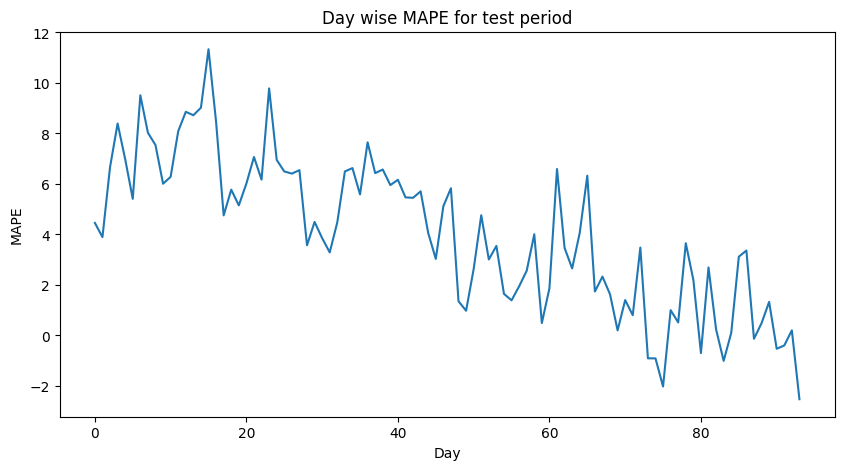

In [135]:
plt.figure(figsize= (10, 5))
plt.xlabel("Day")
plt.ylabel("MAPE")
plt.title("Day wise MAPE for test period")
plt.plot(mape_day)
plt.show()

In [112]:
train = val[:train_data_len]
valid = val[:test_data_len]

36164
(36164,)
<class 'numpy.ndarray'>
[ 8805 34236 15237 15909 32225  2757 32226 27036 34143 32880]


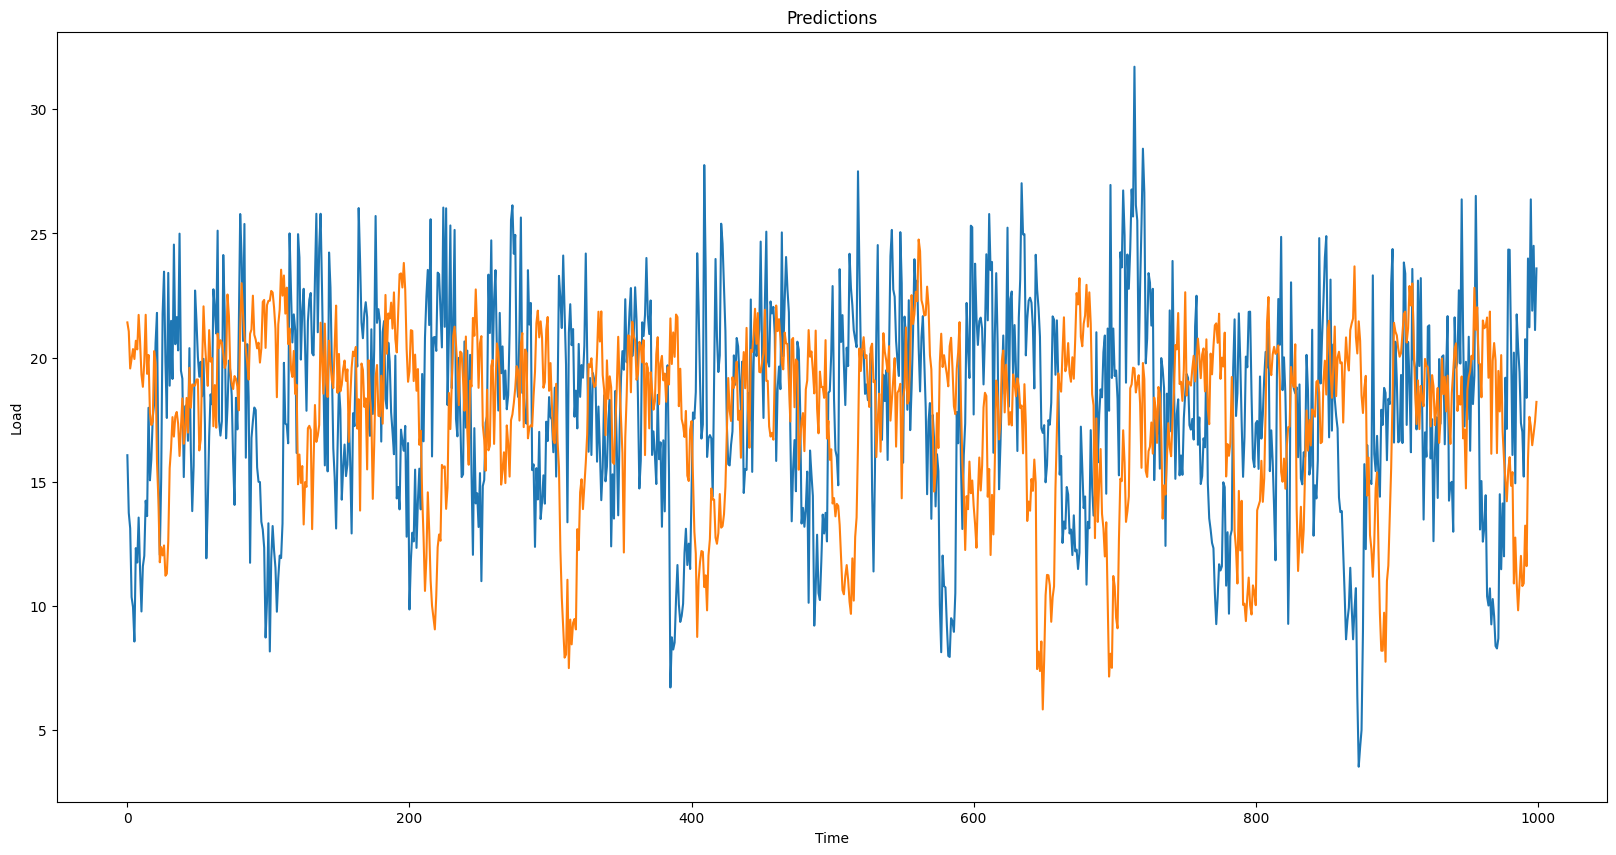

In [115]:

plt.figure(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Predictions')
print(len(train))
print(train.shape)
print(type(train))
# plt.plot(train)
train= train.reshape((train.shape[0], ))
# print(train[:96])
# print(train[100])
print(np.argsort(train)[-10:])
# print(sorted(train)[-50:])
plt.plot(valid[:1000])
plt.plot(pred[:1000])